<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/ParsingBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize things

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



# sentences and grammars: chunking


In [ ]:
# Some possible grammars to create parse tree
# grammar=" " #empty grammar
# grammar = "NP: {<JJ><NN>}"
# grammar = "NP: {<DT>?<JJ>*<NN>}"

grammar = """
    NP: {<DT>?<JJ>*<NN>}                      # Noun Phrase
    VP: {<VB.*><NP|PP>+}                      # Verb Phrase
    PP: {<IN><NP>}                            # Prepositional Phrase
    ADJP: {<RB>*<JJ>}                         # Adjective Phrase
    CS: {<NP><VP><CC><NP><VP>}                # Compound Sentence
    NER: {<NNP>+}                             # Named Entity Recognition
"""

parser = nltk.RegexpParser(grammar)

In [ ]:
# Menu of sentences to be tagged #
sentence="See Spot run."
# sentence="The quick brown fox jumped over the lazy dog."
 #sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
# sentence='They can fish.'
# sentence='Flying planes can be dangerous'
print(sentence)

See Spot run.


In [ ]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['See', 'Spot', 'run', '.']
POS tags are [('See', 'VB'), ('Spot', 'NNP'), ('run', 'VB'), ('.', '.')]


In [ ]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S See/VB (NER Spot/NNP) run/VB ./.)


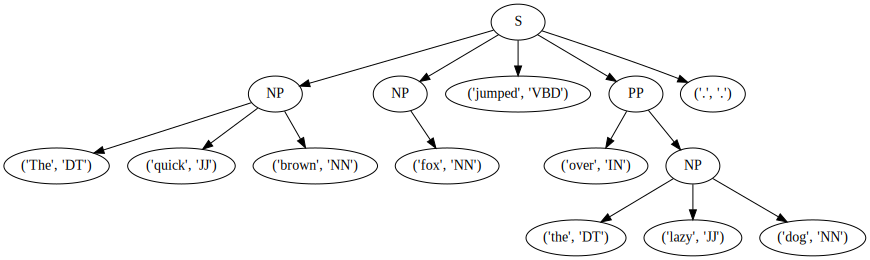

In [ ]:
dot_source = to_graphviz(tree)
display(dot_source)

# Adjusting "The quick brown fox jumped over the lazy dog."

The tagger incorrectly identifies "brown" as a noun.

In [ ]:
# prompt: replace ('brown', 'NN') with  ('brown', 'JJ") in tagged
for i, (word, tag) in enumerate(tagged):
  if word == 'brown' and tag == 'NN':
    tagged[i] = ('brown', 'JJ')

print(tagged)


[('The', 'DT'), ('quick', 'JJ'), ('brown', 'JJ'), ('fox', 'NN'), ('jumped', 'VBD'), ('over', 'IN'), ('the', 'DT'), ('lazy', 'JJ'), ('dog', 'NN'), ('.', '.')]


In [ ]:
tree = parser.parse(tagged)
print(tree)

(S
  (NP The/DT quick/JJ brown/JJ fox/NN)
  jumped/VBD
  (PP over/IN (NP the/DT lazy/JJ dog/NN))
  ./.)


In [ ]:
dot_source = to_graphviz(tree)
display(dot_source)

# Adjusting "They can fish."
We want to adjust the tagging so that we get the meaning of "a group of people who put fish into cans."

In [ ]:
# prompt: In tagged replace the POS for "can" to be a verb and the POS for "fish" to be a noun

for i, (word, tag) in enumerate(tagged):
  if word == 'can' and tag == 'MD':
    tagged[i] = ('can', 'VB')
  if word == 'fish' and tag == 'VB':
    tagged[i] = ('fish', 'NN')

print(tagged)


[('They', 'PRP'), ('can', 'VB'), ('fish', 'NN'), ('.', '.')]


In [ ]:
#  Create tree
tree = parser.parse(tagged)
print(tree)

(S They/PRP (VP can/VB (NP fish/NN)) ./.)


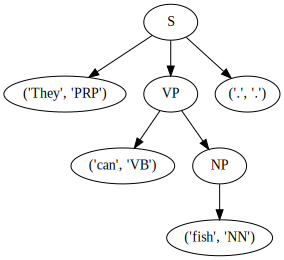

In [ ]:
dot_source = to_graphviz(tree)
display(dot_source)

# Context Free Grammars

In [28]:
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP | NP VP PP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'the' | 'my'
N -> 'man' | 'telescope'
V -> 'saw'
P -> 'with'
""")

In [29]:
groucho_grammar

<Grammar with 14 productions>

In [30]:
type(groucho_grammar)

nltk.grammar.CFG

In [31]:
groucho_grammar.start()

S

In [32]:
groucho_grammar.productions()

[S -> NP VP,
 S -> NP VP PP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'the',
 Det -> 'my',
 N -> 'man',
 N -> 'telescope',
 V -> 'saw',
 P -> 'with']

In [33]:
from nltk.grammar import *
groucho_grammar.productions(lhs=Nonterminal("NP"))

[NP -> Det N, NP -> Det N PP, NP -> 'I']

In [34]:
groucho_grammar.productions(rhs=Nonterminal("Det"))

[NP -> Det N, NP -> Det N PP]

In [35]:
pp = groucho_grammar.productions(rhs=Nonterminal("Det"))
pp[0]

NP -> Det N

In [36]:
pp[0].lhs()

NP

In [37]:
pp[0].rhs()

(Det, N)

In [38]:
sent = ['I', 'saw', 'the', 'man', 'with', 'the', 'telescope']
parser = nltk.ChartParser(groucho_grammar)
trees = list(parser.parse(sent))

In [39]:
print(trees[0])

(S
  (NP I)
  (VP (V saw) (NP (Det the) (N man)))
  (PP (P with) (NP (Det the) (N telescope))))


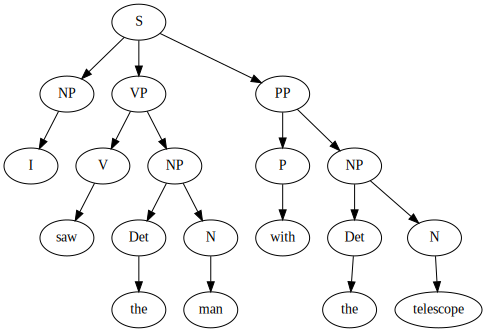

In [40]:
dot_source = to_graphviz(trees[0])
display(dot_source)

In [41]:
print(trees[1])

(S
  (NP I)
  (VP
    (VP (V saw) (NP (Det the) (N man)))
    (PP (P with) (NP (Det the) (N telescope)))))


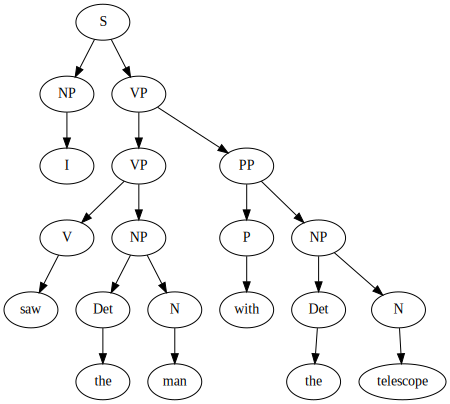

In [42]:
dot_source = to_graphviz(trees[1])
display(dot_source)